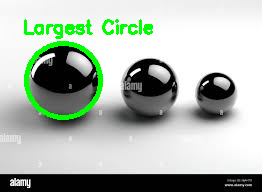

True

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Im
# Load the image
image_path = "/content/round2.jpeg"  # the path to  image
image = cv2.imread(image_path)
output = image.copy()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Detect circles using HoughCircles
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=30,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=100
)

if circles is not None:
    # Convert circles to integer values
    circles = np.round(circles[0, :]).astype("int")

    # Find the largest circle
    largest_circle = max(circles, key=lambda c: c[2])  # Largest radius

    # Get the circle details
    x, y, radius = largest_circle

    # Draw the largest circle on the output image
    cv2.circle(output, (x, y), radius, (0, 255, 0), 4)
    cv2.putText(output, "Largest Circle", (x - 40, y - radius - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display the result using cv2_imshow
cv2_imshow(output) # Use cv2_imshow instead of cv2.imshow

cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the output image
cv2.imwrite("largest_circle.jpg", output)
